# Week 06 : Cost Functions

# Q1

In [1]:
import pandas as pd

data = pd.read_csv('/home/student/Desktop/salary_experience.csv')
X = data["experience"].values
y = data["salary"].values


In [5]:
print(data)

    salary  experience
0      1.7         1.2
1      2.4         1.5
2      2.3         1.9
3      3.1         2.2
4      3.7         2.4
5      4.2         2.5
6      4.4         2.8
7      6.1         3.1
8      5.4         3.3
9      5.7         3.7
10     6.4         4.2
11     6.2         4.4


In [3]:
import numpy as np

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


# Q1a

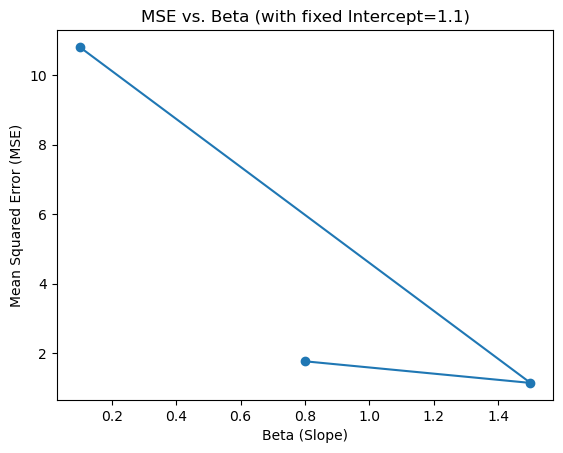

In [6]:
import matplotlib.pyplot as plt

intercept = 1.1
beta_values = [0.1, 1.5, 0.8]

mse_values_a = []

for beta in beta_values:
    y_pred = beta * X + intercept
    mse = calculate_mse(y, y_pred)
    mse_values_a.append(mse)

plt.plot(beta_values, mse_values_a, marker='o')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta (with fixed Intercept=1.1)')
plt.show()


# Q1b

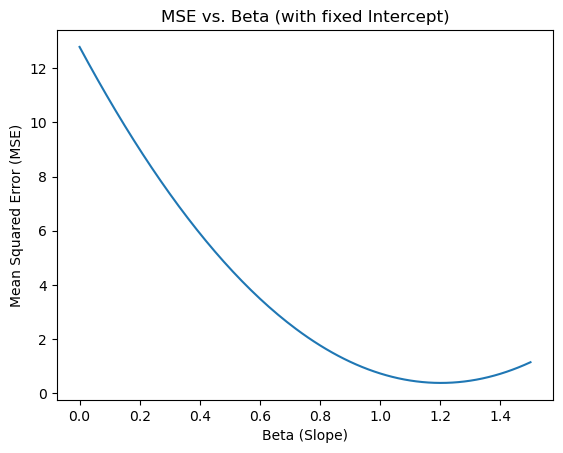

In [14]:
beta_values_b = np.arange(0, 1.51, 0.01)
mse_values_b = []

for beta in beta_values_b:
    y_pred = beta * X + intercept
    mse = calculate_mse(y, y_pred)
    mse_values_b.append(mse)

plt.plot(beta_values_b, mse_values_b)
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta (with fixed Intercept)')
plt.show()


# Q1c

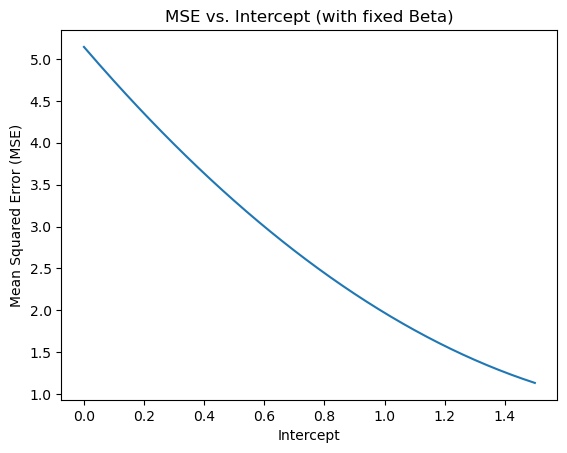

In [8]:
intercept_values_c = np.arange(0, 1.51, 0.01)
mse_values_c = []

for intercept_c in intercept_values_c:
    y_pred = 0.8 * X + intercept_c 
    mse = calculate_mse(y, y_pred)
    mse_values_c.append(mse)

plt.plot(intercept_values_c, mse_values_c)
plt.xlabel('Intercept')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Intercept (with fixed Beta)')
plt.show()


# Q1d

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

y_pred_sklearn = model.predict(X.reshape(-1, 1))
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print("MSE using scikit-learn:", mse_sklearn)


MSE using scikit-learn: 0.23366710810280555


# Q2

# Q2a

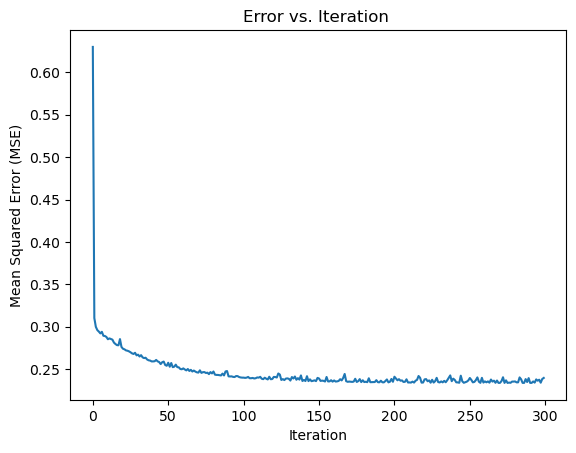

In [17]:
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01

np.random.seed(0)
B0 = np.random.rand()
B1 = np.random.rand()
error_values = []
iterations = []

total_iterations = 60
epochs = 5

for iteration in range(total_iterations):
    for _ in range(epochs):
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(len(X)):
            y_pred = B0 + B1 * X_shuffled[i]
            
            error = y_pred - y_shuffled[i]
            
            B0 -= learning_rate * error
            B1 -= learning_rate * error * X_shuffled[i]
        
        mse = np.mean((y - (B0 + B1 * X)) ** 2)
        
        error_values.append(mse)
        iterations.append(iteration * epochs + _)

plt.plot(iterations, error_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error vs. Iteration ')
plt.show()


# Q2b

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgd_model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=60 * 5, random_state=0)

sgd_model.fit(X.reshape(-1, 1), y)

B0_sgd = sgd_model.intercept_[0]
B1_sgd = sgd_model.coef_[0]

y_pred_sgd = sgd_model.predict(X.reshape(-1, 1))
mse_sgd = mean_squared_error(y, y_pred_sgd)

print("Results using scikit-learn SGD:")
print("B0 (Intercept):", B0_sgd)
print("B1 (Slope):", B1_sgd)
print("MSE:", mse_sgd)


Results using scikit-learn SGD:
B0 (Intercept): 0.38321645763324963
B1 (Slope): 1.4243129518448867
MSE: 0.25347797184878296


# Q2c

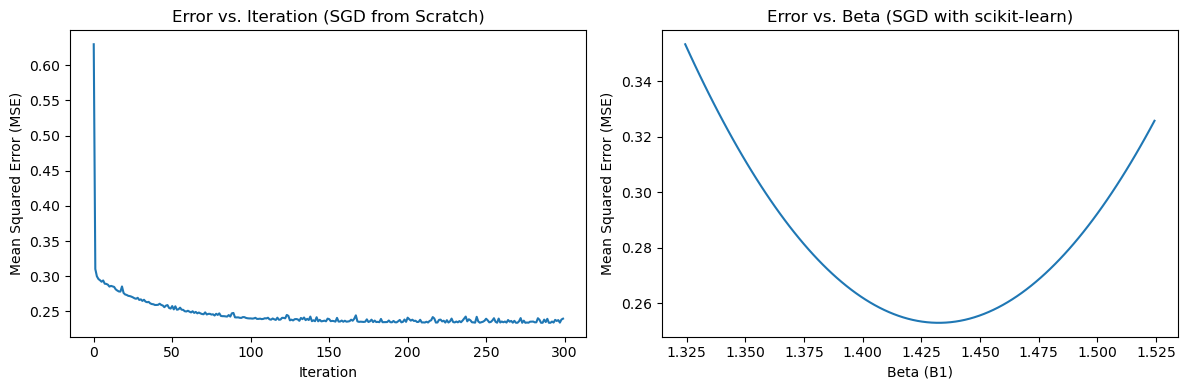

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(iterations, error_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error vs. Iteration (SGD from Scratch)')

plt.subplot(122)
beta_values_sgd = np.linspace(B1_sgd - 0.1, B1_sgd + 0.1, num=100)
error_values_sgd = []

for beta in beta_values_sgd:
    y_pred_sgd = B0_sgd + beta * X
    mse_sgd = mean_squared_error(y, y_pred_sgd)
    error_values_sgd.append(mse_sgd)

plt.plot(beta_values_sgd, error_values_sgd)
plt.xlabel('Beta (B1)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error vs. Beta (SGD with scikit-learn)')
plt.tight_layout()
plt.show()


# Aditional Question

In [40]:
import pandas as pd

data = pd.read_csv("/home/student/Desktop/Salary_Data.csv")

X = data["YearsExperience"].values
y = data["Salary"].values
learning_rate = 0.01 
n_epochs = 100  
errors = []


In [41]:
print(data)

    YearsExperience  Salary  Is_High_sal
0               1.1   39343            1
1               1.3   46205            1
2               1.5   37731            0
3               2.0   43525            0
4               2.2   39891            0
5               2.9   56642            1
6               3.0   60150            1
7               3.2   54445            0
8               3.2   64445            1
9               3.7   57189            0
10              3.9   63218            0
11              4.0   55794            0
12              4.0   56957            0
13              4.1   57081            0
14              4.5   61111            0
15              4.9   67938            1
16              5.1   66029            0
17              5.3   83088            1
18              5.9   81363            0
19              6.0   93940            1
20              6.8   91738            0
21              7.1   98273            1
22              7.9  101302            1
23              

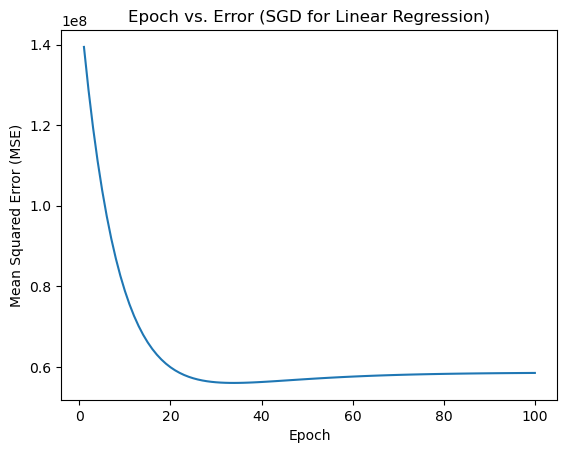

In [42]:
sgd_model = SGDRegressor(learning_rate="constant", eta0=learning_rate, max_iter=1, random_state=0)

for epoch in range(n_epochs):
    sgd_model.partial_fit(X.reshape(-1, 1), y)
    
    y_pred = sgd_model.predict(X.reshape(-1, 1))
    
    mse = mean_squared_error(y, y_pred)
    errors.append(mse)

plt.plot(range(1, n_epochs + 1), errors)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Epoch vs. Error (SGD for Linear Regression)')
plt.show()


In [44]:
print("Done")

Done
